In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Nanum Gothic')
plt.rcParams['figure.dpi']=100

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)

In [7]:
#상위 30위에 해당하는 출판사 고르기
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_index = ns_book7['출판사'].isin(top30_pubs.index)

In [8]:
#원하는 자료로 데이터 정제
ns_book9 = ns_book7[top30_pubs_index][['출판사','발행년도','대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사','발행년도']).sum()
ns_book9 = ns_book9.reset_index()   

/var/folders/hl/v8wjcd3d7sb1xbjy562xy3400000gn/T/ipykernel_47473/1859919218.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


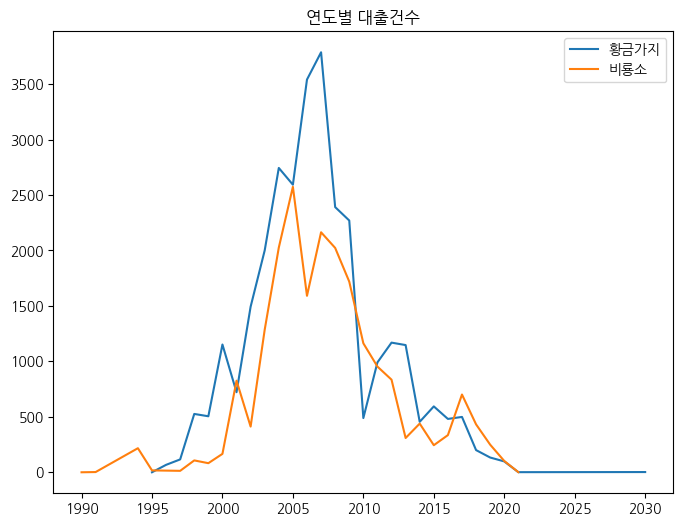

In [9]:
line1 = ns_book9[ns_book9['출판사']=='황금가지']
line2 = ns_book9[ns_book9['출판사']=='비룡소']

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line1['발행년도'], line1['대출건수'],label = '황금가지')
ax.plot(line2['발행년도'], line2['대출건수'],label = '비룡소')
ax.set_title('연도별 대출건수')
ax.legend() #범례추가
fig.show()

In [10]:
#1번
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [11]:
#2번
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)

/var/folders/hl/v8wjcd3d7sb1xbjy562xy3400000gn/T/ipykernel_47473/27549462.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


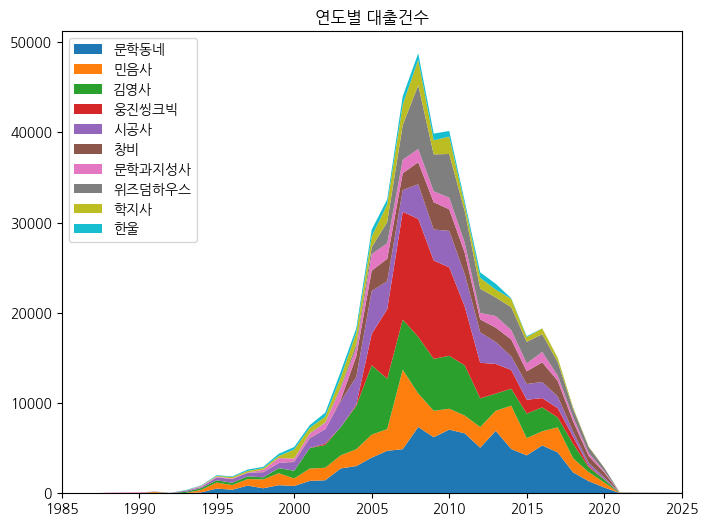

In [12]:
#3번
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985,2025)
fig.show()

/var/folders/hl/v8wjcd3d7sb1xbjy562xy3400000gn/T/ipykernel_47473/1544087809.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


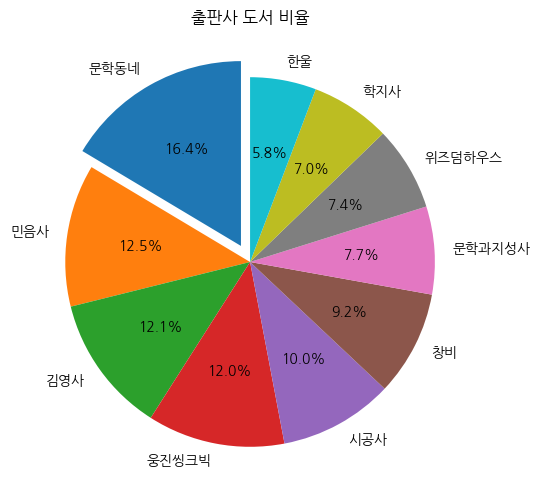

In [13]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels,startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()